<a href="https://colab.research.google.com/github/Ashvik2008/Class118-Clustering/blob/MASTER/Class118_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

\
When you look for things such as music, you might want to look for meaningful groups. It could be from a particular artist, a particular genre, a particular language or a particular decade. How you group items gives you more insights about it.

\
You might find you have a strong linking for vintage music, or something upbeat.

\
In machine learning, we can often group examples to understand more about the data. Grouping unlabelled examples is called clustering.

\
For example, let's say that you have a dataset of flowers, with different petal and sepal size but you want to identify what kind of a flower are they. For this, you can group the blobs in the scatter plot and then based on the attributes of the cluster, you can identify what flower it is.

\
One of the most widely used algorithms for clustering is the K-means algorithm.

\
![alt text](https://drive.google.com/uc?export=view&id=16nTiBIOiu0vFdYTpffhdML_9idPun8Wd)


\
# Applications of clustering

\
It has a wide use of activities. Based on the example above, it can be used in the field of biology to differentiate species from each other, or it can be used to identify different images / audio. It can also be used to group behaviours, or detecting abnormal behaviour.

\
# How does it work?

\
We are going to study the K-means algorithm. The first step to perform here is to decide the number of clusters. The `K` signifies the number of clusters that the algorithm would find in the dataset.

\
Choosing the right K is very important. Sometimes, it is clearly visible from the dataset when it is visualised, however, most of the time, this is not the case.

\
## Steps to perform the K-means Algorithm -

\
###Step 1
Choose the number K of clusters

###Step 2
Select randomly the center points (`centroids`) for the K clusters (2 in this case)
\
![alt text](https://drive.google.com/uc?export=view&id=1Ki8gF0PZ-tQLrLmXnWHsPa7T3eLH7VkU)

###Step 3
Assign each data point to the closest centroid
\
![alt text](https://drive.google.com/uc?export=view&id=1n8DXXA_-VJdaY56lvBKnRmh1q8ud4s9V)

###Step 4
Shift the centroids a little for all the clusters
\
![alt text](https://drive.google.com/uc?export=view&id=10C8WJ0EdBMCiD5Qka0-Gn3rOho38s3xz)

###Step 5
Re-assign each data point to the new closest centroid. If any points got reassigned, repeat `Step 4` again otherwise the model is ready.
\
![alt text](https://drive.google.com/uc?export=view&id=14m8LCTZcw2xUZ6CnI54xrhWfbJ_DROa5)

##Summary
\
![alt text](https://drive.google.com/uc?export=view&id=13mSOR4-Z4y_4lTaW1zBwDlqGKxhdNh8x)

# How to choose the right K?

\
We use the `WCSS` perimeter to to evaluate the choice of K. `WCSS` stands for `Within Cluster Sum of Squares`. What this means is that we are going to choose a center point for a cluster, from where all the points falling inside that cluster will be closest.

Then, we will calculate the distance of all the points from the center, add up all the distances and then note the value.

We will then take 2 centre points and do the same. We will choose the value of K to be the one which has the minimum sum of all the distances.

\
The `Elbow method` can be used to choose the best value for K. Let's see how it works!

\
Here, we are going to take up a data of some of the flowers, and we want to cluster them to know how many species of flower's data do we have.

In [51]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("petals_sepals.csv")

print(df.head())

fig = px.scatter(df, x="petal_size", y="sepal_size")
fig.show()

   petal_size  sepal_size
0   11.323484   13.866161
1    9.265842   13.443414
2   14.329944    7.956200
3   11.883902    7.658534
4    9.957722   12.273535


Now, let's find the best K value by using the `WCSS` perimeter and the `Elbow method`.

In [52]:
#Pandas provide a unique method to retrieve rows from a Data frame. Dataframe.iloc[] method is used when the index label of a data 
#frame is something other than numeric series of 0, 1, 2, 3….n or in case the user doesn’t know the index label.
#the range is taken to 11 as we need 10 cluster points.

from sklearn.cluster import KMeans

X = df.iloc[:, [0, 1]].values

print(X)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 42)
    kmeans.fit(X)
    #inertia method returns wcss for that model
    wcss.append(kmeans.inertia_) #inertia method returns wcss for that model.

[[11.32348369 13.86616131]
 [ 9.26584161 13.4434136 ]
 [14.32994392  7.95619956]
 [11.88390198  7.65853411]
 [ 9.95772216 12.27353488]
 [11.87446585 13.23783855]
 [11.05434664  8.34645832]
 [ 9.92501036  9.63140484]
 [ 6.72330556 12.91052608]
 [ 1.7547028   4.92229755]
 [ 2.53760792  2.39274409]
 [ 0.82826409  2.57057886]
 [14.17308088  9.03309242]
 [ 2.8166071   2.21911623]
 [ 8.6152154  12.96116714]
 [12.87654335  8.38760135]
 [14.08781072  6.68177744]
 [ 2.59059319  2.04203334]
 [ 3.32057276  4.34097779]
 [ 3.32553533  2.20737103]
 [10.01773429  9.49527624]
 [ 9.20235232 13.7895536 ]
 [10.47443458 13.03790983]
 [11.45457896  8.76001507]
 [11.03565171  9.70704578]
 [13.46897961  8.43272357]
 [14.40798387  8.68145304]
 [11.49414942 12.35569869]
 [11.88685783  8.13176978]
 [ 8.54247125 13.30436616]
 [13.86822339  9.45088543]
 [10.49468563 12.56398709]
 [10.16523291 13.23462868]
 [12.32039217  9.30666119]
 [ 0.958256    4.44098269]
 [ 9.26893891 13.97415349]
 [ 0.61360663  2.76290393]
 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



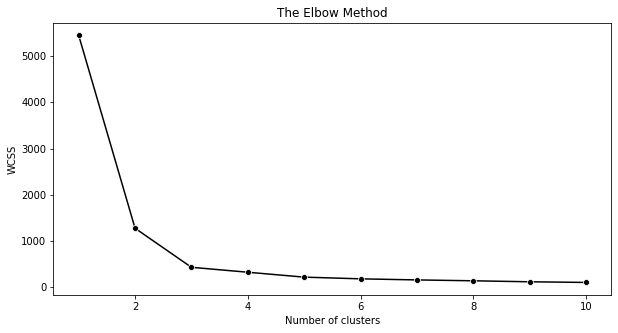

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss, marker='o', color='black')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Now, if we look at the scatterplot we plotted earlier, we can see that their might be around 3 clusters.

\
In the `elbow` chart above, we can see that the WCSS value is decreasing significantly until the `K = 3`. Hence, we can see that our `K` is `3` for the data given.

In [54]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning

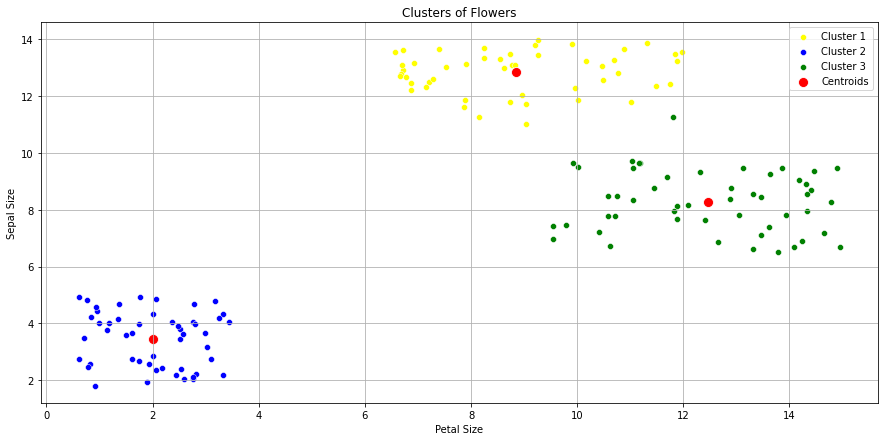

In [55]:
plt.figure(figsize=(15,7))

sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1')
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2')
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3')
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', label = 'Centroids',s=100,marker='o')

plt.grid(True)

plt.title('Clusters of Flowers')
plt.xlabel('Petal Size')
plt.ylabel('Sepal Size')
plt.legend()
plt.show()

Thus, we can see that our model has identified 3 clusters, which means that we had data for 3 different species of flowers.